In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,A New York Love Story,2015
1,Blue Flame,1993
2,Around the Town,1938
3,Dimensions of Failure,2010
4,Ceiling Zero,1936


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


#### From lectures

In [5]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character=='Oscar the Grouch')]
g = c.groupby(['character', c.year//10*10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [6]:
g.unstack()

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [12]:
u = g.unstack(0).fillna(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [13]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

In [20]:
g = c.groupby(['character', c.year//10*10]).size()
df = g.unstack(0)
df['extra'] = 1
df.set_index('extra', append=True)

,character,Kermit the Frog,Oscar the Grouch
year,extra,,
1970,1,1.0,NaN
1980,1,4.0,2.0
1990,1,2.0,1.0
2000,1,1.0,1.0
2010,1,1.0,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [33]:
c = cast
c.head()
c = c[(c.character=='Superman') | (c.character=='Batman')]
g = c.groupby(by=['year', 'character']).size()
u = g.unstack().fillna(0)
d = u['Superman'] - u['Batman']
len(d[d >0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [34]:
len(d[d<0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

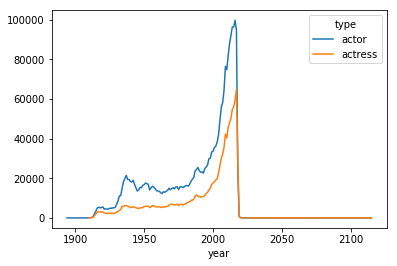

In [43]:
c = cast
g = c.groupby(by=['year','type']).size()
u = g.unstack('type')
u.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

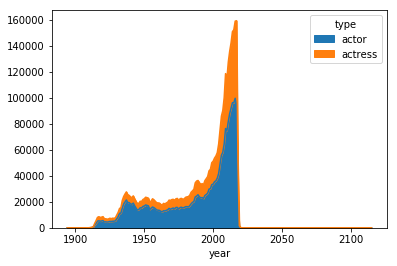

In [45]:
c = cast
g = c.groupby(by=['year', 'type']).size()
u = g.unstack('type')
u.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

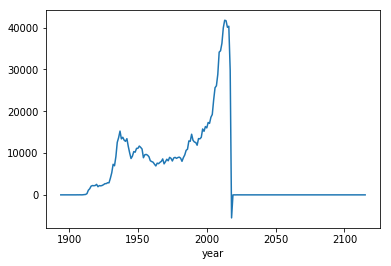

In [55]:
c = cast
g = c.groupby(by=['year', 'type']).size()
u = g.unstack('type').fillna(0)
# d = u['actor'] - u['actress']
# d.plot()
(u.actor - u.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

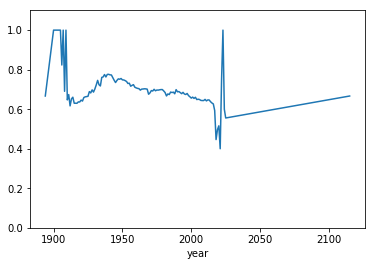

In [62]:
c = cast
g = c.groupby(by=['year','type']).size()
u = g.unstack('type').fillna(0)
s = (u.actor/(u.actor + u.actress))
s.plot(ylim=[0, 1.1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

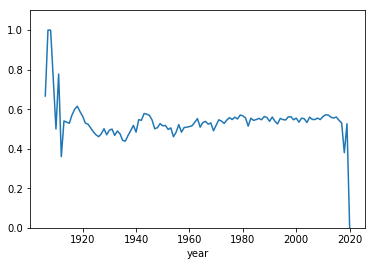

In [64]:
c = cast
c = c[c.n==2]
g = c.groupby(by=['year', 'type']).size()
u = g.unstack('type').fillna(0)
(u.actor / (u.actor + u.actress)).plot(ylim=[0, 1.1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

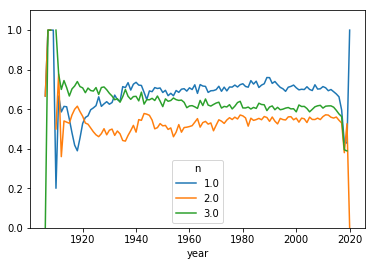

In [87]:
c = cast
c = c[c.n <=3]
g = c.groupby(by=['year', 'n', 'type']).size()
u = g.unstack('type').fillna(0)
r = u.actor/ (u.actor + u.actress)
r.unstack('n').plot(ylim=[0, 1.1])